In [1]:
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import proplot as pplt
import fitsio as fio
import h5py as h5
from astropy.coordinates import SkyCoord
from astropy import units as uu
import glob
from tqdm import tqdm
from des_y6utils import mdet
import healsparse
import pandas as pd

In [5]:
z_file = "/pscratch/sd/m/myamamot/gold/15188.fits"
d_cosmos = fio.read(z_file)
print(len(d_cosmos), d_cosmos.dtype)

746976 [('id', '>i8'), ('alpha_j2000', '>f8'), ('delta_j2000', '>f8'), ('hsc_i_mag', '>f8'), ('hsc_i_magerr', '>f8'), ('ez_z_phot', '>f4'), ('flag_combined', '>i8')]


No handles with labels found to put in legend.
<ipython-input-12-95a9d2329510>:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


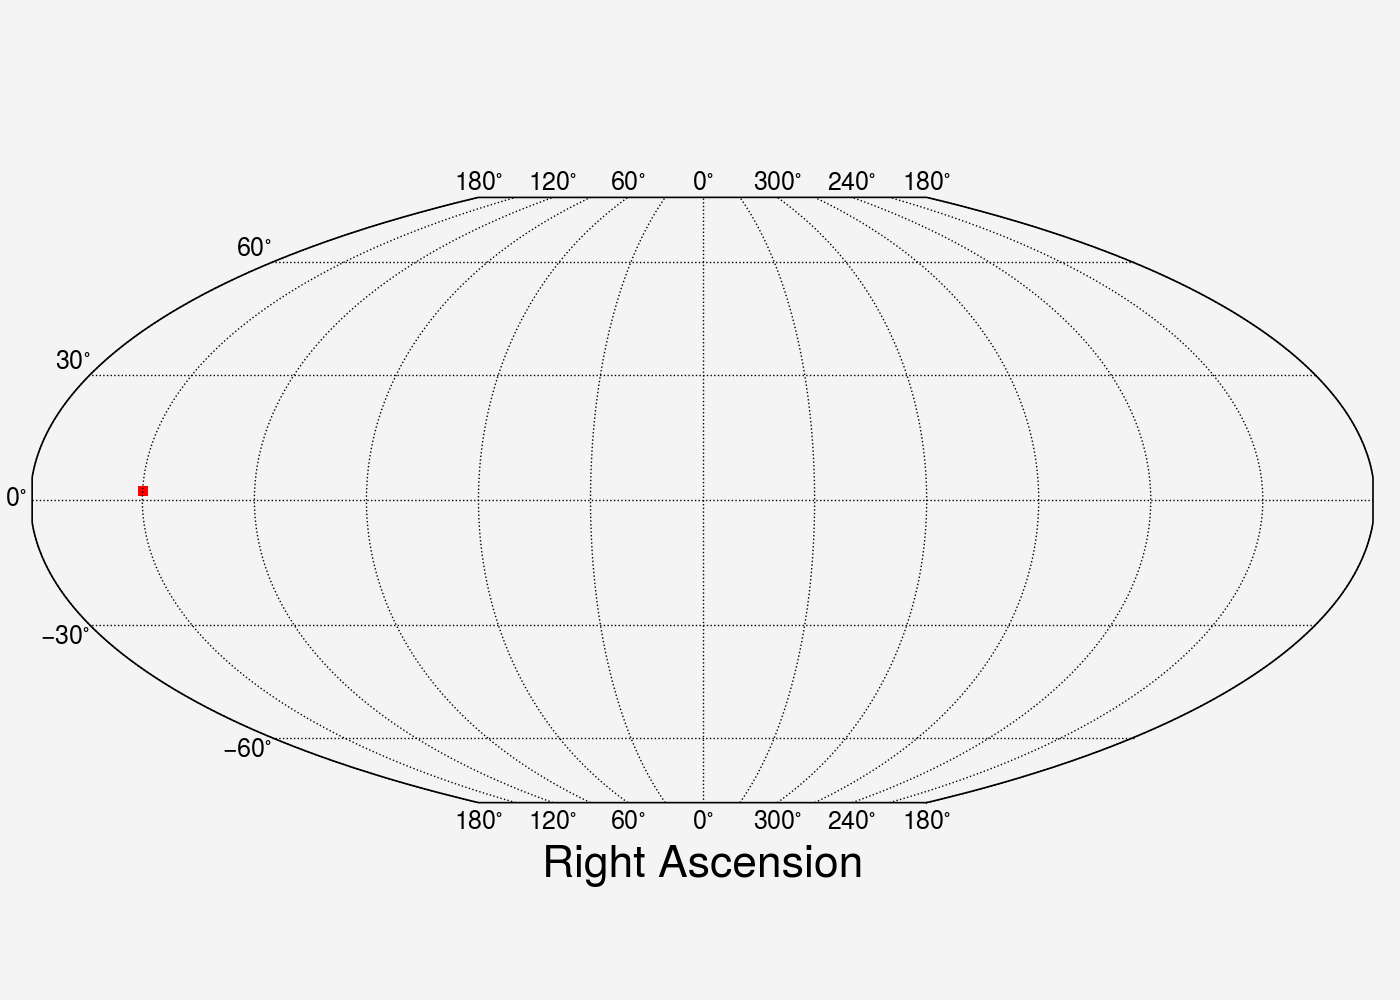

In [12]:
hmap = healsparse.HealSparseMap.read("/global/cfs/cdirs/des/y6-shear-catalogs/y6-combined-hleda-gaiafull-des-stars-hsmap131k-mdet-v1.hsp")
f = '/global/cfs/cdirs/des/y6-shear-catalogs/Y6A2_METADETECT_V5b/metadetect_desdmv5a_cutsv5_patchesv5b.h5'
mdet_data = h5.File(f, 'r')
d = mdet_data.get('/mdet/noshear')
ra = np.array(d['ra']); dec = np.array(d['dec'])

from matplotlib import pyplot as plt
import proplot as pplt
import skyproj
%matplotlib inline

fig,ax = plt.subplots(figsize=(7,5), nrows=1, ncols=1, sharey=False, sharex=False)
m = skyproj.McBrydeSkyproj(ax=ax, autorescale=False)
# _ = m.draw_hspmap(hmap, cmap='rocket')

# m.scatter(ra, dec, s=1, marker='o', c='k', zorder=20, label="DES")
m.scatter(d_cosmos['alpha_j2000']*uu.degree, d_cosmos['delta_j2000']*uu.degree, s=1, marker='o', c='r', zorder=20, label="COSMOS20")
# m.set_extent([303.9,304.2,-52.3,-52.2])
#m.set_extent([300,315,-56,-49])
ax.legend()
plt.tight_layout()

In [ ]:
from astropy.coordinates import SkyCoord
from astropy import units as uu

cat1 = SkyCoord(ra=d_cosmos['alpha_j2000']*uu.degree, dec=d_cosmos['delta_j2000']*uu.degree)
cat2 = SkyCoord(ra=np.array(d_gold['RA'])*uu.degree, dec=np.array(d_gold['DEC'])*uu.degree)
idx, d2d, d3d = cat1.match_to_catalog_sky(cat2, nthneighbor=1)